In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
import pandas as pd
import os
import re
import codecs
from IPython.display import display, Image as ipImage
import PIL
from PIL import Image
from scipy import ndimage
from six.moves import cPickle as pickle
import string
from PIL import Image
import numpy as np
import h5py

In [32]:
width = None
pd.options.display.max_rows = 600
pd.options.display.max_columns = width
pd.options.display.max_colwidth = 600
pd.options.display.width = width
pd.options.display.max_seq_items = None
pd.options.display.expand_frame_repr = False
pd.options.display.colheader_justify = 'left'
data_folder = '../data/generated2'
data_dir = data_folder
image_folder = '../data/im2latex-100k/formula_images'
processed_image_folder =  '../data/im2latex-100k/processed_formula_images'

In [3]:
import data_commons as dtc
import dl_commons as dlc
import hyper_params as hp

Using TensorFlow backend.


In [25]:
def ndImage(path, mode=None):
    # Flatten=True collapses the RGB channels into a single grayscale
    #return ndimage.imread(path, flatten=True)
    return ndimage.imread(path, mode=mode)

def PILImage(path, mode=None):
    img = Image.open(path)
    if mode is not None:
        img = img.convert(mode)
    return img

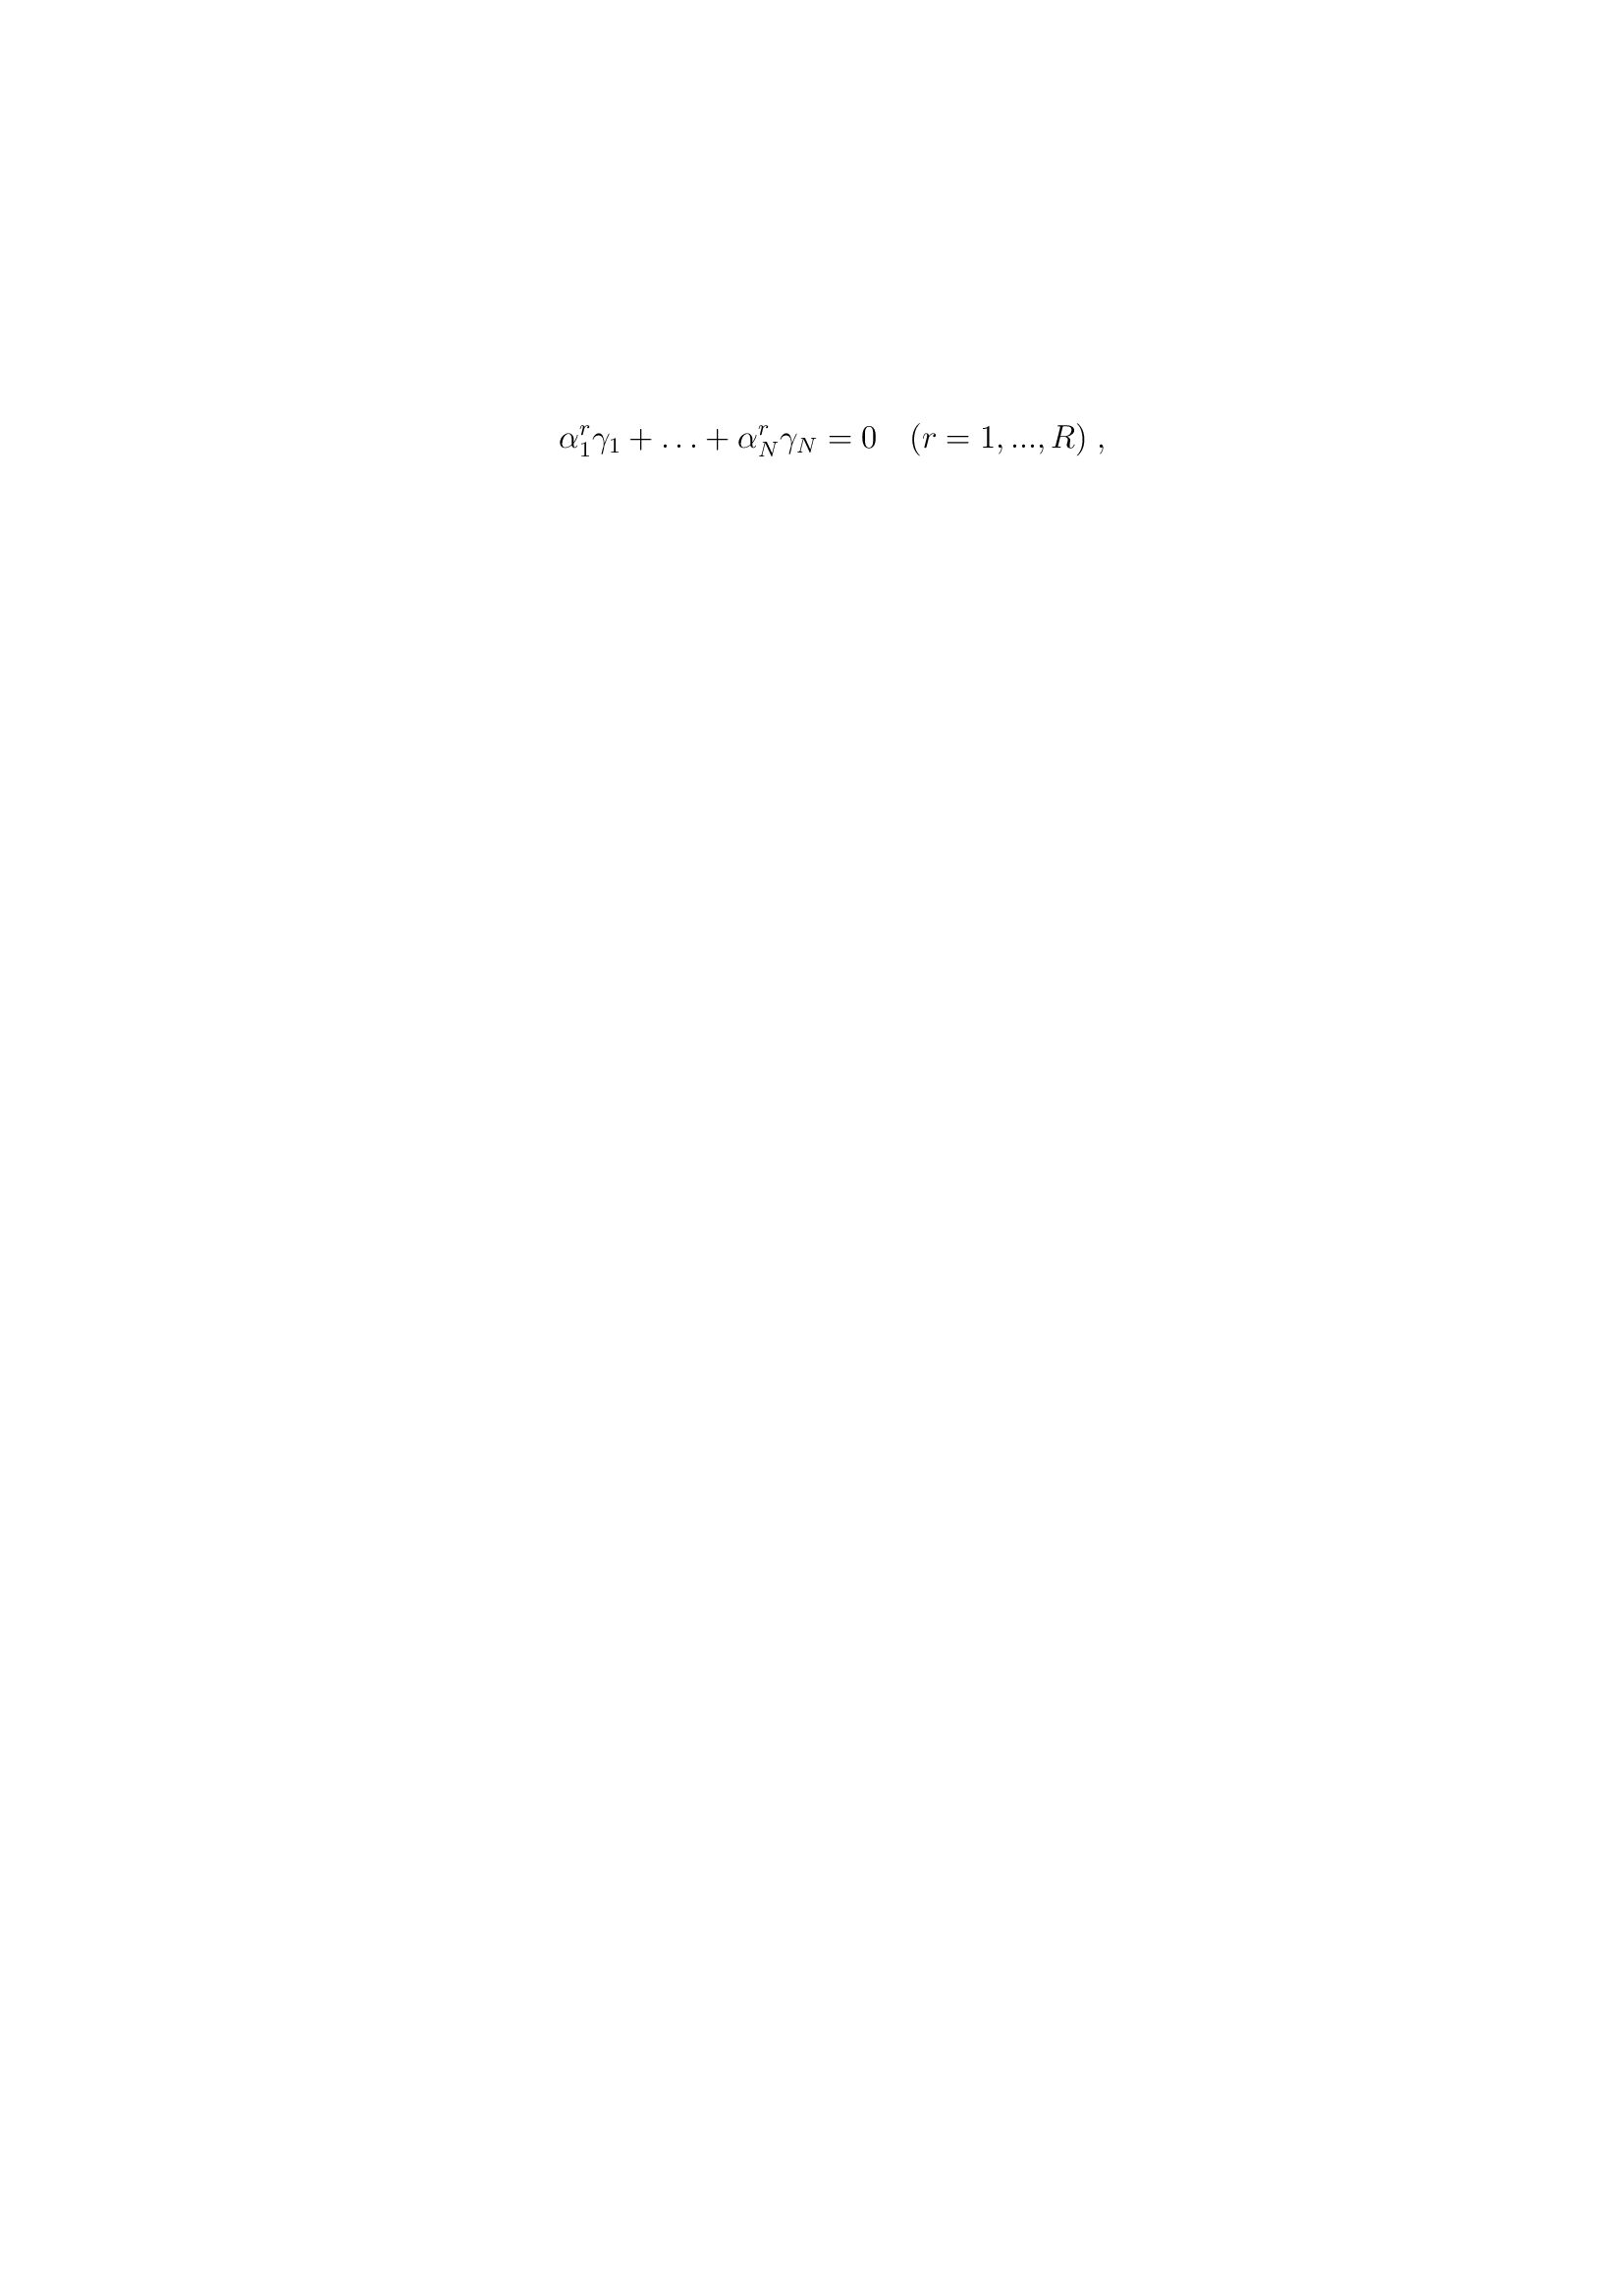

In [26]:
display(ipImage(filename=os.path.join(image_folder, '7944775fc9.png'), format='png', unconfined=True))

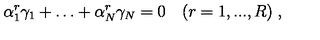

In [27]:
display(ipImage(filename=os.path.join(processed_image_folder, '7944775fc9.png'), format='png', unconfined=True))

In [28]:
print PILImage(os.path.join(processed_image_folder, '7944775fc9.png'))

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=320x40 at 0x7F63F4978A50>


In [30]:
print PILImage(os.path.join(image_folder, '7944775fc9.png'))

<PIL.PngImagePlugin.PngImageFile image mode=P size=1654x2339 at 0x7F63F4A74AD0>


In [39]:
dict_id2word = pd.read_pickle(os.path.join(data_dir, 'dict_id2word.pkl'))
df_vocab = pd.read_pickle(os.path.join(data_dir,'df_vocab.pkl'))

In [44]:
df_vocab

,id,freq
,556,863152
!,3,8052
"""",4,62
#,5,93
$,6,3908
&,7,29294
',8,20412
(,9,204696
),10,204723
*,11,6578


In [43]:
df_vocab.loc[r'\begin']

id       129
freq    7355
Name: \begin, dtype: int64

In [38]:
dict_id2word

{0: '\\eos',
 1: '\\bos',
 2: '~',
 3: '!',
 4: '"',
 5: '#',
 6: '$',
 7: '&',
 8: "'",
 9: '(',
 10: ')',
 11: '*',
 12: '+',
 13: ',',
 14: '-',
 15: '.',
 16: '/',
 17: '0',
 18: '1',
 19: '2',
 20: '3',
 21: '4',
 22: '5',
 23: '6',
 24: '7',
 25: '8',
 26: '9',
 27: ':',
 28: ';',
 29: '<',
 30: '=',
 31: '>',
 32: '?',
 33: '@',
 34: 'A',
 35: 'B',
 36: 'C',
 37: 'D',
 38: 'E',
 39: 'F',
 40: 'G',
 41: 'H',
 42: 'I',
 43: 'J',
 44: 'K',
 45: 'L',
 46: 'M',
 47: 'N',
 48: 'O',
 49: 'P',
 50: 'Q',
 51: 'R',
 52: 'S',
 53: 'T',
 54: 'U',
 55: 'V',
 56: 'W',
 57: 'X',
 58: 'Y',
 59: 'Z',
 60: '[',
 61: '\\',
 62: '\\AA',
 63: '\\Big',
 64: '\\Bigg',
 65: '\\Biggl',
 66: '\\Biggm',
 67: '\\Biggr',
 68: '\\Bigl',
 69: '\\Bigm',
 70: '\\Bigr',
 71: '\\C',
 72: '\\Delta',
 73: '\\Downarrow',
 74: '\\Flows',
 75: '\\Gamma',
 76: '\\Huge',
 77: '\\Im',
 78: '\\J',
 79: '\\L',
 80: '\\LARGE',
 81: '\\Lambda',
 82: '\\Large',
 83: '\\Leftrightarrow',
 84: '\\Longleftarrow',
 85: '\\Longleft